<a href="https://colab.research.google.com/github/anilkrp/data-analysis-projects/blob/main/HR%20Analytics%20Dataset%20-%20EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
print('Done----')

Done----


In [5]:
hr = pd.read_csv('HR_Analytics.csv')

In [6]:

hr.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [7]:
# the shape of dataset
row, collumns = hr.shape
print(f'The dataset has {row} rows and {collumns} collumns')

The dataset has 1480 rows and 38 collumns


In [8]:
# basic information about the dataset
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

so, there 25 int, 12 object(string) and one float features.
**YearsWithCurrManager** has some missing values.


In [9]:
print(hr.isna().sum()*100/row)

EmpID                       0.000000
Age                         0.000000
AgeGroup                    0.000000
Attrition                   0.000000
BusinessTravel              0.000000
DailyRate                   0.000000
Department                  0.000000
DistanceFromHome            0.000000
Education                   0.000000
EducationField              0.000000
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction     0.000000
Gender                      0.000000
HourlyRate                  0.000000
JobInvolvement              0.000000
JobLevel                    0.000000
JobRole                     0.000000
JobSatisfaction             0.000000
MaritalStatus               0.000000
MonthlyIncome               0.000000
SalarySlab                  0.000000
MonthlyRate                 0.000000
NumCompaniesWorked          0.000000
Over18                      0.000000
OverTime                    0.000000
PercentSalaryHike           0.000000
P

In [10]:
# apply describe mehtod on top 5 usefull featues

hr[['Age', 'MonthlyIncome', 'YearsAtCompany', 'TotalWorkingYears', 'DistanceFromHome']].describe()


,Age,MonthlyIncome,YearsAtCompany,TotalWorkingYears,DistanceFromHome
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000
mean,36.917568,6504.985811,7.009459,11.281757,9.220270
std,9.128559,4700.261400,6.117945,7.770870,8.131201
min,18.000000,1009.000000,0.000000,0.000000,1.000000
25%,30.000000,2922.250000,3.000000,6.000000,2.000000
50%,36.000000,4933.000000,5.000000,10.000000,7.000000
75%,43.000000,8383.750000,9.000000,15.000000,14.000000
max,60.000000,19999.000000,40.000000,40.000000,29.000000


In [11]:
hr['YearsWithCurrManager'].value_counts()

,count
YearsWithCurrManager,
2.0,330
0.0,253
7.0,211
3.0,139
8.0,100
4.0,95
1.0,76
9.0,61
5.0,31


In [12]:
# apply mehtod to fill mssing values with mean

hr['YearsWithCurrManager'] = hr['YearsWithCurrManager'].fillna(hr['YearsWithCurrManager'].mean())


In [13]:
# check dupliacte values

hr.duplicated().sum()

7

In [14]:
# remove duplicated values

hr.drop_duplicates(inplace=True)


In [15]:
hr['EmpID'].value_counts()

,count
EmpID,
RM1467,2
RM1466,2
RM1465,2
RM297,1
RM958,1
RM1084,1
RM1046,1
RM1041,1
RM1030,1


there are three EmpID are twice in the dataset. I'll remove them.

In [16]:
# remove EmpID who have more than one time

hr = hr[hr['EmpID'].map(hr['EmpID'].value_counts()) == 1]


In [17]:
hr['EmpID'].value_counts()

,count
EmpID,
RM297,1
RM1097,1
RM1084,1
RM1046,1
RM1041,1
RM1030,1
RM979,1
RM968,1
RM960,1


<Axes: xlabel='AgeGroup'>

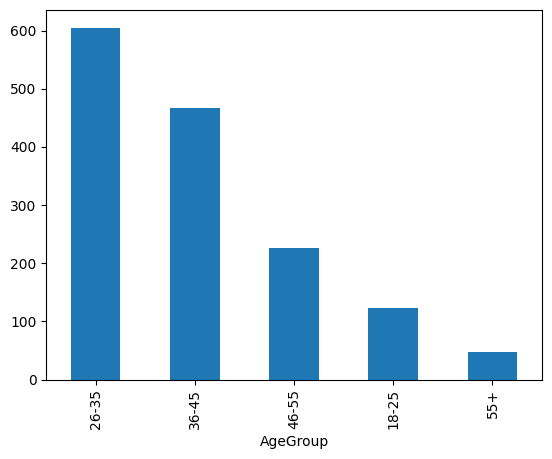

In [18]:
# age group value_count
hr['AgeGroup'].value_counts()
hr['AgeGroup'].value_counts().plot(kind='bar')

Attrition
No     1230
Yes     237
Name: count, dtype: int64


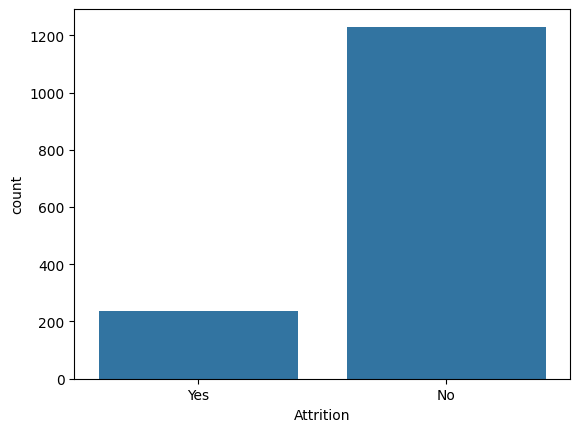

In [19]:
print(hr['Attrition'].value_counts())
sns.countplot(x='Attrition', data=hr)
plt.show()

In [20]:
# TravelRarely':'Travel_Rarely in bussiness_travel'

hr['BusinessTravel'] = hr['BusinessTravel'].replace('TravelRarely', 'Travel_Rarely')
hr['BusinessTravel'] = hr['BusinessTravel'].replace('Non-Travel', 'Non_Travel')


BusinessTravel
Travel_Rarely        1041
Travel_Frequently     276
Non_Travel            150
Name: count, dtype: int64


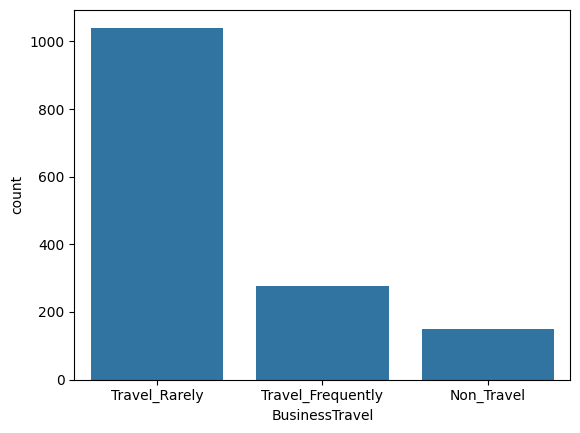

In [21]:
print(hr['BusinessTravel'].value_counts())
sns.countplot(x='BusinessTravel', data=hr)
plt.show()

Department
Research & Development    959
Sales                     445
Human Resources            63
Name: count, dtype: int64


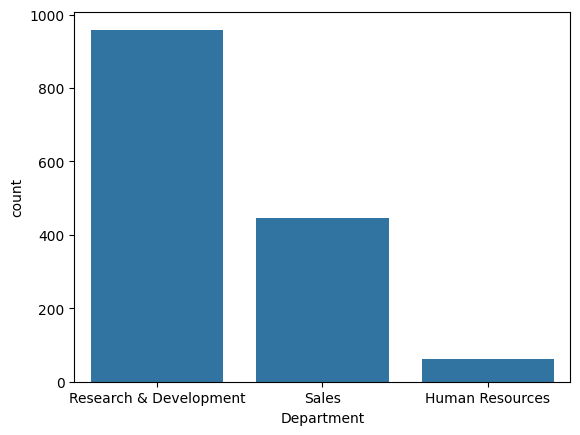

In [22]:
print(hr['Department'].value_counts())
sns.countplot(x='Department', data=hr)
plt.show()

In [23]:
# apply group method on department and count age group

temp = hr.groupby('Department')['AgeGroup'].value_counts().reset_index(name='count')

print(temp)

px.bar(temp, x='Department', y='count', color='AgeGroup', title='Department vs AgeGroup')


                Department AgeGroup  count
0          Human Resources    36-45     25
1          Human Resources    26-35     23
2          Human Resources    46-55      8
3          Human Resources    18-25      4
4          Human Resources      55+      3
5   Research & Development    26-35    389
6   Research & Development    36-45    315
7   Research & Development    46-55    146
8   Research & Development    18-25     78
9   Research & Development      55+     31
10                   Sales    26-35    193
11                   Sales    36-45    126
12                   Sales    46-55     72
13                   Sales    18-25     41
14                   Sales      55+     13


In [24]:
# a apply group mehtod  department and count values of educatiionfield and apply reset_index

temp = hr.groupby('Department')['EducationField'].value_counts().reset_index(name='count')
print(temp)
px.bar(temp, x='Department', y='count', color='EducationField', title='Department vs EducationField')


                Department    EducationField  count
0          Human Resources   Human Resources     27
1          Human Resources     Life Sciences     16
2          Human Resources           Medical     13
3          Human Resources  Technical Degree      4
4          Human Resources             Other      3
5   Research & Development     Life Sciences    440
6   Research & Development           Medical    361
7   Research & Development  Technical Degree     94
8   Research & Development             Other     64
9                    Sales         Marketing    159
10                   Sales     Life Sciences    150
11                   Sales           Medical     88
12                   Sales  Technical Degree     34
13                   Sales             Other     14


In [25]:
# a apply group mehtod  department and count values of gender and apply reset_index

temp = hr.groupby('Department')['Gender'].value_counts().reset_index(name='count')
print(temp)
px.bar(temp, x='Department', y='count', color='Gender', title='Department vs Gender')


               Department  Gender  count
0         Human Resources    Male     43
1         Human Resources  Female     20
2  Research & Development    Male    580
3  Research & Development  Female    379
4                   Sales    Male    257
5                   Sales  Female    188


In [26]:
# a apply group mehtod  department and count values of OverTime and apply reset_index

temp = hr.groupby('Department')['OverTime'].value_counts().reset_index(name='count')
print(temp)
px.bar(temp, x='Department', y='count', color='OverTime', title='Department vs OverTime')


               Department OverTime  count
0         Human Resources       No     46
1         Human Resources      Yes     17
2  Research & Development       No    688
3  Research & Development      Yes    271
4                   Sales       No    317
5                   Sales      Yes    128


In [27]:
# a apply group mehtod  department and count values of BusinessTravel and apply reset_index

temp = hr.groupby('Department')['BusinessTravel'].value_counts().reset_index(name='count')
print(temp)
px.bar(temp, x='Department', y='count', color='BusinessTravel', title='Department vs BusinessTravel')


               Department     BusinessTravel  count
0         Human Resources      Travel_Rarely     46
1         Human Resources  Travel_Frequently     11
2         Human Resources         Non_Travel      6
3  Research & Development      Travel_Rarely    681
4  Research & Development  Travel_Frequently    181
5  Research & Development         Non_Travel     97
6                   Sales      Travel_Rarely    314
7                   Sales  Travel_Frequently     84
8                   Sales         Non_Travel     47


In [28]:
# a apply group mehtod  department and count values of JobRole and apply reset_index

temp = hr.groupby('Department')['JobRole'].value_counts().reset_index(name='count')
print(temp)
px.bar(temp, x='Department', y='count', color='JobRole', title='Department vs JobRole')


                Department                    JobRole  count
0          Human Resources            Human Resources     52
1          Human Resources                    Manager     11
2   Research & Development         Research Scientist    292
3   Research & Development      Laboratory Technician    258
4   Research & Development     Manufacturing Director    145
5   Research & Development  Healthcare Representative    130
6   Research & Development          Research Director     80
7   Research & Development                    Manager     54
8                    Sales            Sales Executive    326
9                    Sales       Sales Representative     82
10                   Sales                    Manager     37


In [29]:
# a apply group mehtod  department and count values of SalarySlab and apply reset_index

temp = hr.groupby('Department')['SalarySlab'].value_counts().reset_index(name='count')
print(temp)
px.bar(temp, x='Department', y='count', color='SalarySlab', title='Department vs SalarySlab')

                Department SalarySlab  count
0          Human Resources    Upto 5k     36
1          Human Resources     5k-10k     14
2          Human Resources       15k+     10
3          Human Resources    10k-15k      3
4   Research & Development    Upto 5k    551
5   Research & Development     5k-10k    216
6   Research & Development    10k-15k    100
7   Research & Development       15k+     92
8                    Sales     5k-10k    209
9                    Sales    Upto 5k    160
10                   Sales    10k-15k     45
11                   Sales       15k+     31


DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      64
4      64
6      58
16     32
11     29
24     28
29     27
18     26
23     26
15     26
25     25
26     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64


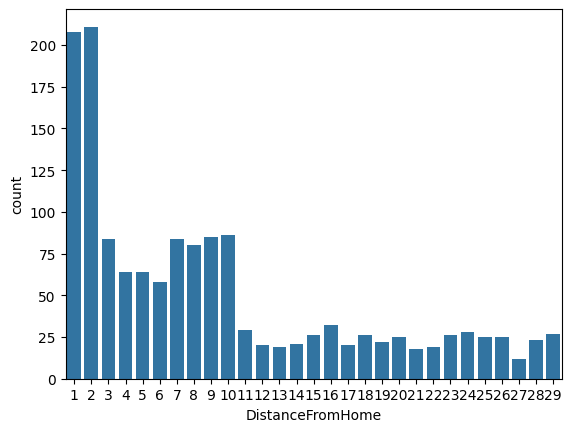

In [30]:
dfh = hr['DistanceFromHome'].value_counts()
print(dfh)
sns.countplot(x='DistanceFromHome', data=hr)
plt.show()

Education
3    571
4    398
2    281
1    169
5     48
Name: count, dtype: int64


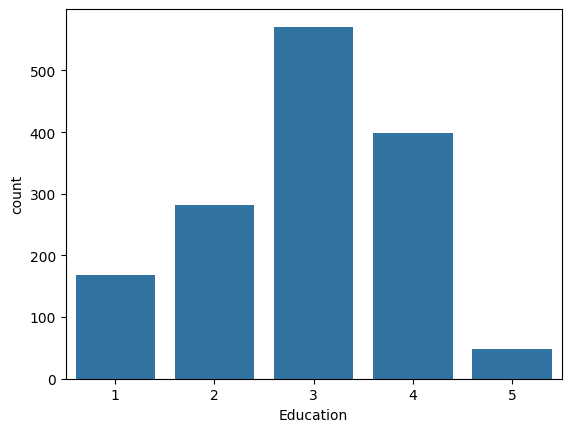

In [31]:
edu = hr['Education'].value_counts()
print(edu)
sns.countplot(x='Education', data=hr)
plt.show()

EnvironmentSatisfaction
Very Good    452
Excellent    444
Good         287
Bad          284
Name: count, dtype: int64


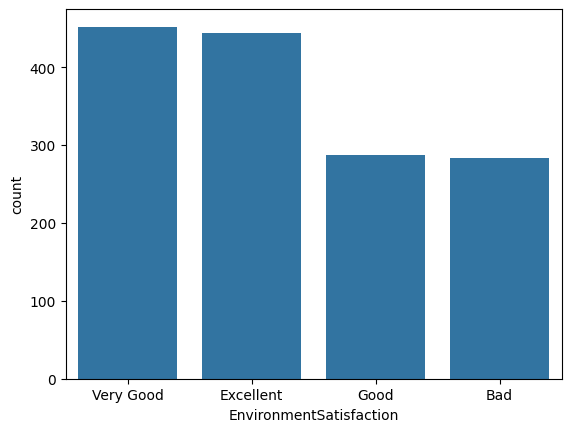

In [32]:

hr['EnvironmentSatisfaction'] = hr['EnvironmentSatisfaction'].map({1: 'Bad', 2: 'Good', 3: 'Very Good', 4: 'Excellent'})
satisfication = hr['EnvironmentSatisfaction'].value_counts()
print(satisfication)
sns.countplot(x='EnvironmentSatisfaction', data=hr)
plt.show()

MaritalStatus
Married     671
Single      469
Divorced    327
Name: count, dtype: int64


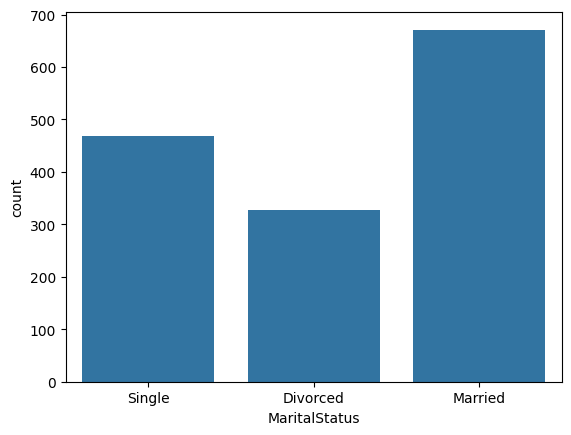

In [33]:
MaritalStatus=hr['MaritalStatus'].value_counts()
print(MaritalStatus)
plot = sns.countplot(x='MaritalStatus', data=hr)
plt.show()

In [34]:
temp = hr.groupby('MaritalStatus')['Gender'].value_counts().reset_index(name='count')
print(temp)
px.bar(temp, x='MaritalStatus', y='count', color='Gender', title='MaritalStatus vs Gender')

  MaritalStatus  Gender  count
0      Divorced    Male    210
1      Divorced  Female    117
2       Married    Male    399
3       Married  Female    272
4        Single    Male    271
5        Single  Female    198


In [35]:
temp = hr['JobRole'].value_counts().reset_index()
print(temp)
px.bar(temp, x='JobRole', y='count', title='JobRole')

                     JobRole  count
0            Sales Executive    326
1         Research Scientist    292
2      Laboratory Technician    258
3     Manufacturing Director    145
4  Healthcare Representative    130
5                    Manager    102
6       Sales Representative     82
7          Research Director     80
8            Human Resources     52


OverTime
No     1051
Yes     416
Name: count, dtype: int64


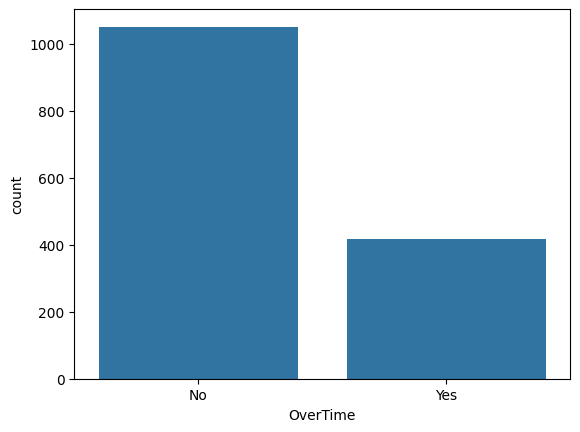

In [36]:
# how many people work as overtime

print(hr['OverTime'].value_counts())


sns.countplot(x='OverTime', data=hr)
plt.show()


In [37]:
hr['PercentSalaryHike'].value_counts()

,count
PercentSalaryHike,
11,210
13,209
14,201
12,198
15,100
18,88
17,81
16,78
19,76


PerformanceRating
Excellent      1241
Outstanding     226
Name: count, dtype: int64


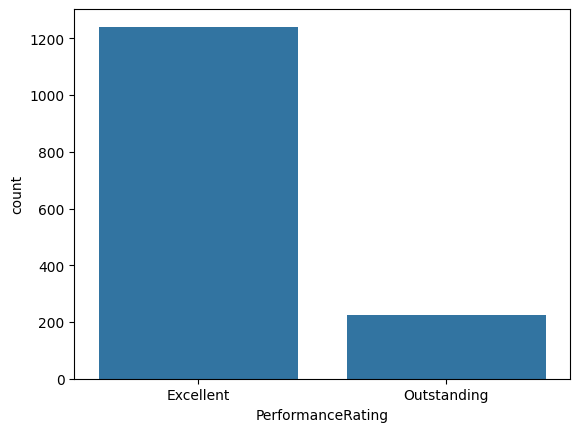

In [38]:
hr['PerformanceRating'] = hr['PerformanceRating'].map({1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding'})
temp = hr['PerformanceRating'].value_counts()
print(temp)
sns.countplot(x='PerformanceRating', data=hr)
plt.show()


In [41]:
Department_PerformanceRating = hr.groupby('Department')['PerformanceRating'].value_counts().reset_index(name='count')
Department_PerformanceRating['JobSatisfaction'] = Department_PerformanceRating['PerformanceRating'].map({'Low':1, 'Good':2, 'Excellent':3, 'Outstanding':4})
print(Department_PerformanceRating)

               Department PerformanceRating  count  JobSatisfaction
0         Human Resources         Excellent     54                3
1         Human Resources       Outstanding      9                4
2  Research & Development         Excellent    803                3
3  Research & Development       Outstanding    156                4
4                   Sales         Excellent    384                3
5                   Sales       Outstanding     61                4


In [43]:
RelationshipSatisfaction_count = hr['RelationshipSatisfaction'].value_counts().reset_index()
RelationshipSatisfaction_count['RelationshipSatisfaction']=RelationshipSatisfaction_count['RelationshipSatisfaction'].replace({1:'bad',2:'Good',3:'Very Good',4:'Excellent'})
print(RelationshipSatisfaction_count)

  RelationshipSatisfaction  count
0                Very Good    458
1                Excellent    431
2                     Good    303
3                      bad    275


In [44]:
Department_RelationshipSatisfaction = hr.groupby('Department')['RelationshipSatisfaction'].value_counts().reset_index(name='count')
Department_RelationshipSatisfaction['RelationshipSatisfaction']  = Department_RelationshipSatisfaction['RelationshipSatisfaction'].replace({1:'bad',2:'Good',3:'Very Good',4:'Excellent'})
print(Department_RelationshipSatisfaction)

                Department RelationshipSatisfaction  count
0          Human Resources                Very Good     24
1          Human Resources                Excellent     20
2          Human Resources                     Good     11
3          Human Resources                      bad      8
4   Research & Development                Very Good    297
5   Research & Development                Excellent    278
6   Research & Development                     Good    212
7   Research & Development                      bad    172
8                    Sales                Very Good    137
9                    Sales                Excellent    133
10                   Sales                      bad     95
11                   Sales                     Good     80


   StockOptionLevel  count
0                 0    630
1                 1    594
2                 2    158
3                 3     85


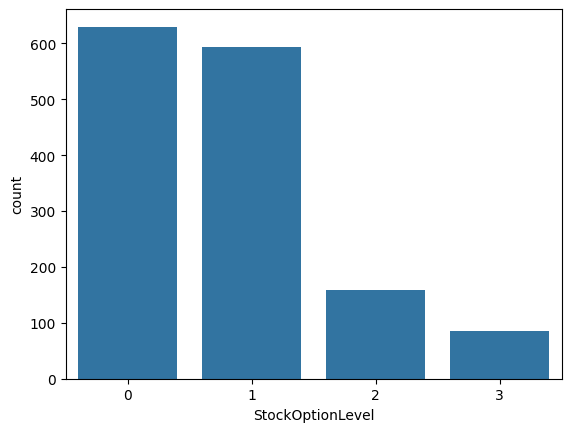

In [46]:
stockOptionLevel_count = hr['StockOptionLevel'].value_counts().reset_index()
print(stockOptionLevel_count)
sns.countplot(x='StockOptionLevel', data=hr)
plt.show()

In [47]:
Department_StockOptionLevel=hr.groupby('Department')['StockOptionLevel'].value_counts().reset_index()
Department_StockOptionLevel['StockOptionLevel']=Department_StockOptionLevel['StockOptionLevel']
Department_StockOptionLevel

,Department,StockOptionLevel,count
0,Human Resources,1,28
1,Human Resources,0,27
2,Human Resources,3,5
3,Human Resources,2,3
4,Research & Development,0,407
5,Research & Development,1,391
6,Research & Development,2,103
7,Research & Development,3,58
8,Sales,0,196
9,Sales,1,175


   TrainingTimesLastYear  count
0                      2    546
1                      3    490
2                      4    123
3                      5    118
4                      1     71
5                      6     65
6                      0     54


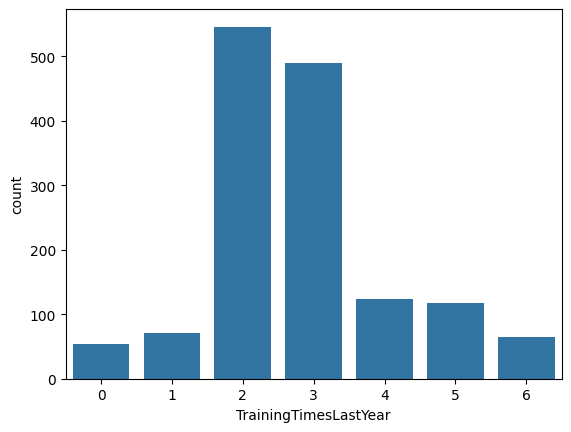

In [48]:
Training_TimesLastYear_count = hr['TrainingTimesLastYear'].value_counts().reset_index()
print(Training_TimesLastYear_count)
sns.countplot(x='TrainingTimesLastYear', data=hr)
plt.show()

In [53]:
temp

,count
AgeGroup,
26-35,605
36-45,466
46-55,226
18-25,123
55+,47


In [56]:

temp = hr['AgeGroup'].value_counts().reset_index(name='count')
fig = px.pie(temp, values='count', names='AgeGroup',title='Age Groups And Total Number of employee in this Groupe  ')
fig.show()


In [58]:
temp = hr['Attrition'].value_counts().reset_index(name='count')
fig = px.pie(temp, values='count', names='Attrition',title='Employee attrition status presantage  ')
fig.show()


In [59]:
temp = hr['BusinessTravel'].value_counts().reset_index(name='count')
fig = px.pie(temp, values='count', names='BusinessTravel',title='Frequency of business travel for the employe   ')
fig.show()

In [60]:
temp = hr['Department'].value_counts().reset_index(name='count')
fig = px.pie(temp, values='count', names='Department',title='Diferant Department in which the employee works    ')
fig.show()

([0, 1], [Text(0, 0, 'Male'), Text(1, 0, 'Female')])

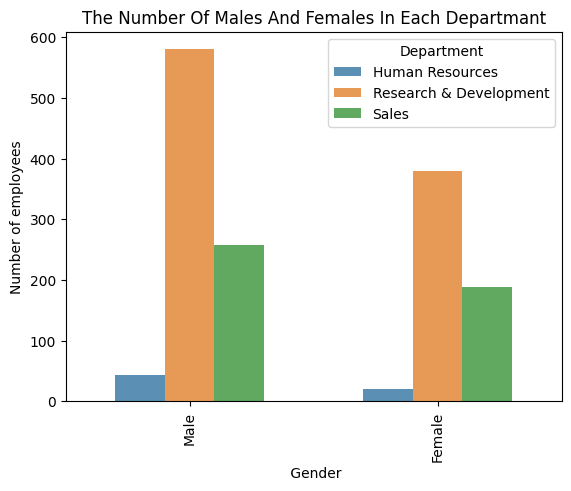

In [65]:
temp = hr.groupby('Department')['Gender'].value_counts().reset_index(name='count')
sns.barplot(data=temp,x='Gender',y='count',hue='Department',alpha=0.8,width=0.6)
plt.title('The Number Of Males And Females In Each Departmant')
plt.xlabel(' Gender')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4],
 [Text(0, 0, '36-45'),
  Text(1, 0, '26-35'),
  Text(2, 0, '46-55'),
  Text(3, 0, '18-25'),
  Text(4, 0, '55+')])

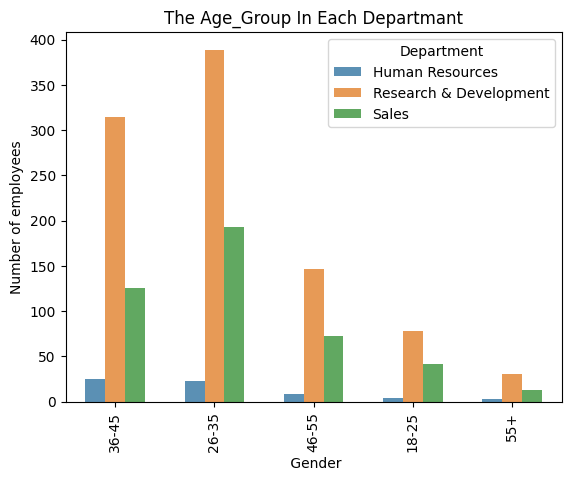

In [67]:
temp = hr.groupby('Department')['AgeGroup'].value_counts().reset_index(name='count')
sns.barplot(data=temp,x='AgeGroup',y='count',hue='Department',alpha=0.8,width=0.6)
plt.title('The Age_Group In Each Departmant')
plt.xlabel(' Gender')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)

([0, 1, 2],
 [Text(0, 0, 'Married'), Text(1, 0, 'Divorced'), Text(2, 0, 'Single')])

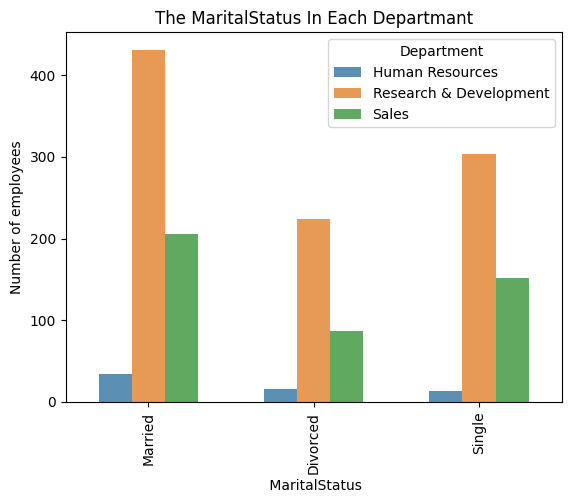

In [68]:
temp = hr.groupby('Department')['MaritalStatus'].value_counts().reset_index(name='count')
sns.barplot(data=temp,x='MaritalStatus',y='count',hue='Department',alpha=0.8,width=0.6)
plt.title('The MaritalStatus In Each Departmant')
plt.xlabel(' MaritalStatus')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Life Sciences'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Technical Degree'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Marketing')])

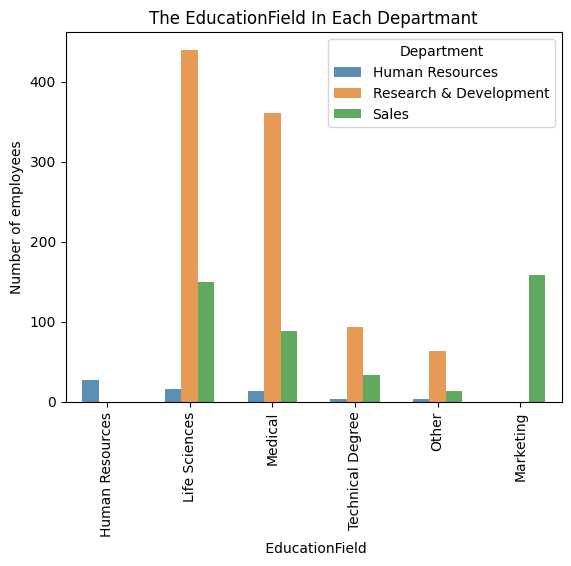

In [69]:
temp = hr.groupby('Department')['EducationField'].value_counts().reset_index(name='count')
sns.barplot(data=temp,x='EducationField',y='count',hue='Department',alpha=0.8,width=0.6)
plt.title('The EducationField In Each Departmant')
plt.xlabel(' EducationField')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Manager'),
  Text(2, 0, 'Research Scientist'),
  Text(3, 0, 'Laboratory Technician'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Healthcare Representative'),
  Text(6, 0, 'Research Director'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

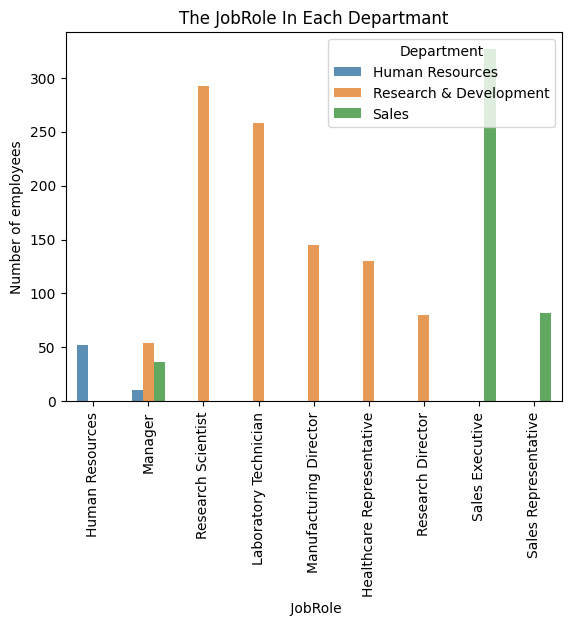

In [70]:
temp = hr.groupby('Department')['JobRole'].value_counts().reset_index(name='count')
sns.barplot(data=temp,x='JobRole',y='count',hue='Department',alpha=0.8,width=0.6)
plt.title('The JobRole In Each Departmant')
plt.xlabel(' JobRole')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)

([0, 1, 2],
 [Text(0, 0, 'Travel_Rarely'),
  Text(1, 0, 'Travel_Frequently'),
  Text(2, 0, 'Non_Travel')])

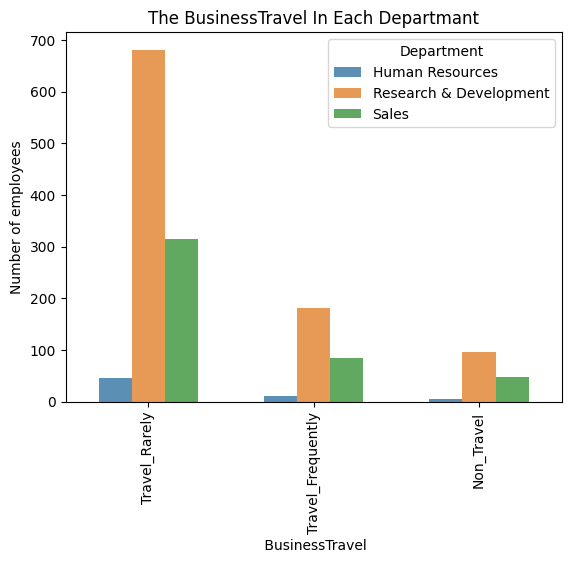

In [71]:
temp = hr.groupby('Department')['BusinessTravel'].value_counts().reset_index(name='count')
sns.barplot(data=temp,x='BusinessTravel',y='count',hue='Department',alpha=0.8,width=0.6)
plt.title('The BusinessTravel In Each Departmant')
plt.xlabel(' BusinessTravel')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)

([0, 1, 2, 3],
 [Text(0, 0, 'Upto 5k'),
  Text(1, 0, '5k-10k'),
  Text(2, 0, '15k+'),
  Text(3, 0, '10k-15k')])

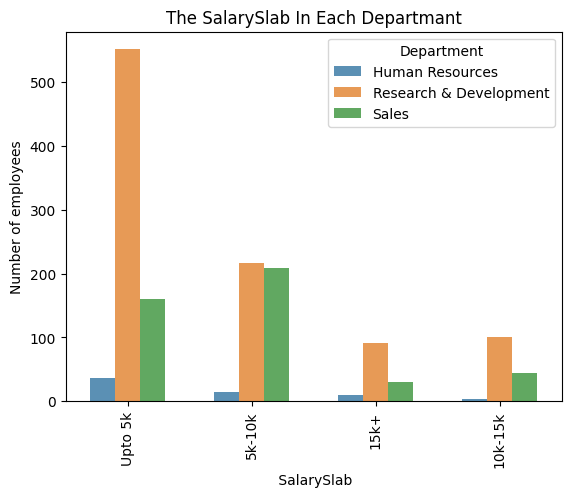

In [72]:
temp = hr.groupby('Department')['SalarySlab'].value_counts().reset_index(name='count')
sns.barplot(data=temp,x='SalarySlab',y='count',hue='Department',alpha=0.8,width=0.6)
plt.title('The SalarySlab In Each Departmant')
plt.xlabel(' SalarySlab')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)

([0, 1], [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

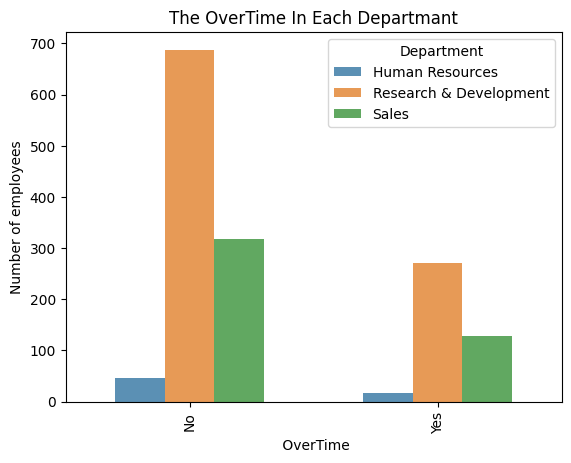

In [73]:
temp = hr.groupby('Department')['OverTime'].value_counts().reset_index(name='count')
sns.barplot(data=temp,x='OverTime',y='count',hue='Department',alpha=0.8,width=0.6)
plt.title('The OverTime In Each Departmant')
plt.xlabel(' OverTime')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)

In [74]:
MaritalStatus_count = hr['MaritalStatus'].value_counts().reset_index(name='count')
fig = px.pie(MaritalStatus_count, values='count', names='MaritalStatus',title='Marital Status And Number of Employee works ')
fig.show()

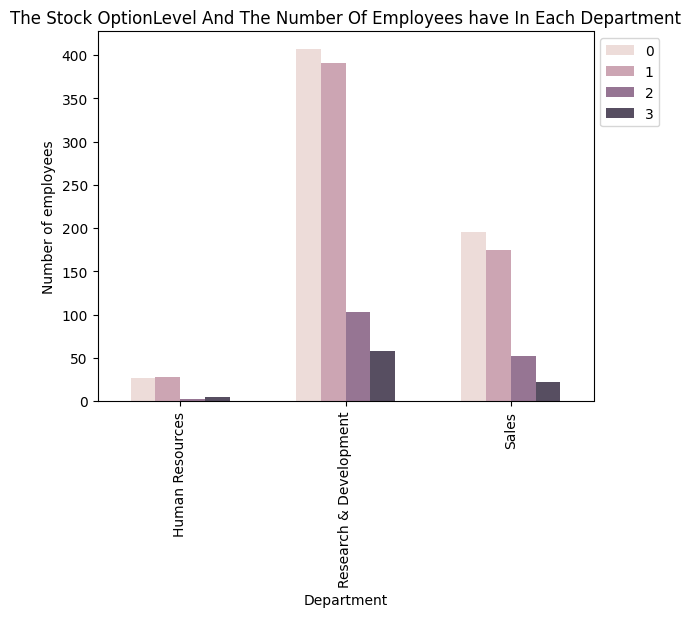

In [75]:
Department_StockOptionLevel = hr.groupby('Department')['StockOptionLevel'].value_counts().reset_index(name='count')
sns.barplot(data=Department_StockOptionLevel,x='Department',y='count',hue='StockOptionLevel', alpha=0.8,width=0.6)
plt.title('The Stock OptionLevel And The Number Of Employees have In Each Department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))

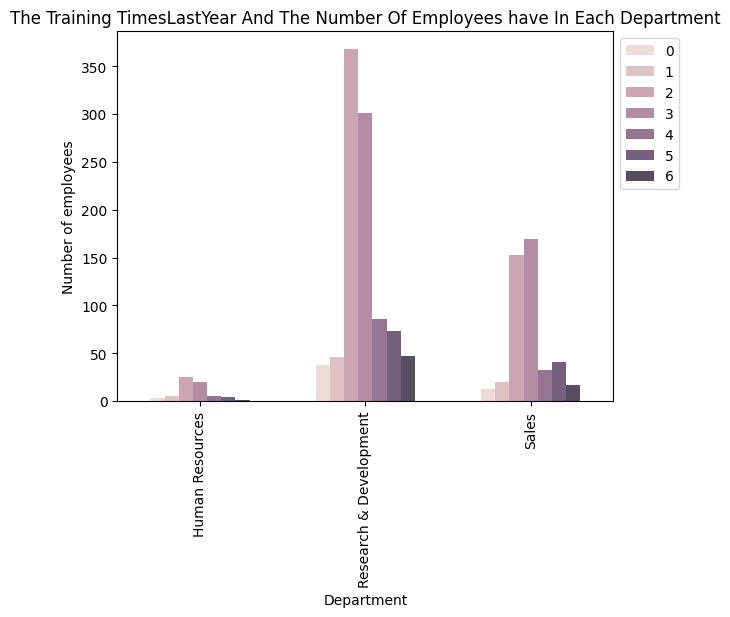

In [76]:
Department_TrainingTimesLastYear = hr.groupby('Department')['TrainingTimesLastYear'].value_counts().reset_index(name='count')
sns.barplot(data=Department_TrainingTimesLastYear,x='Department',y='count',hue='TrainingTimesLastYear', alpha=0.8,width=0.6)
plt.title('The Training TimesLastYear And The Number Of Employees have In Each Department')
plt.xlabel('Department')
plt.ylabel('Number of employees')
plt.xticks(rotation=90)
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))